# Réalisez une régression linéaire sans utiliser de package python

Pour chaque question, aidez-vous des formules mathématiques vectorisées données

https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d

## Import des packages

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1 : implémenter la normalisation (centrage et réduction)

Formule de la standardisation

![centrage_reduction](CR.png)

In [158]:
## Coder Ici
mu = []
std = []

def normalize(data):
	for i in range(0,data.shape[1]-1):
		mu.append(___)
		std.append(___)
		data[:,i] = ((___ - ___)/___)

In [159]:
## Test
test_data = np.array([[2,3,5],
                     [5,6,9],
                     [3,8,4]])
normalize(test_data)
assert (test_data.round(1) == np.array([
    [-1, -1,  5], 
    [ 1,  0,  9], 
    [ 0,  1,  4]])).all()

### Import des données normalisées

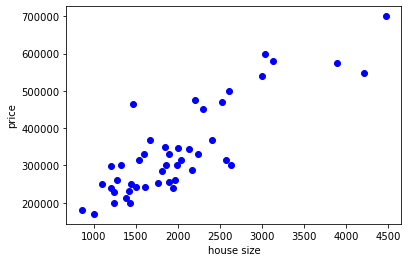

In [160]:
def plot_data(x, y):
	plt.xlabel('house size')
	plt.ylabel('price')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

def load_data(filename):
	df = pd.read_csv(filename, sep=",", index_col=False)
	df.columns = ["housesize", "rooms", "price"]
	data = np.array(df, dtype=float)
	plot_data(data[:,:2], data[:, -1])
	normalize(data)
	return data[:,:2], data[:, -1]

x,y = load_data("house_price_data.txt")

## Question n°2 : Implémenter la fonction h(x)

Les implémentations des fonctions suivantes sont vectorisées


![h(x)](img/vectorized_h.png)


In [161]:
## Coder ici
def h(theta,x):
	return ___

In [162]:
## Test
x_test = np.array([[2,3],
              [5,6]])
theta_test = np.array([2,3])

assert (h(theta_test, x_test).round(1) == np.array([13, 28])).all() 

## Question n°3 : Implémenter la fonction coût

![h(x)](img/cost_function.png)

In [163]:
## Coder ici
def cost_function(x, y, theta):
	return ___

In [164]:
## Test
x_test = np.array([[2,3],
              [5,6]])

y_test = np.array([1,0])

theta_test = np.array([2,3])

assert(cost_function(x_test, y_test, theta_test).round(2) == 232.0)

## Question n°4 : Implémenter la descente du gradient

Definition epoch :

An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large). ... Many models are created with more than one epoch

![h(x)](img/vectorized_gradient-descent.png)

In [165]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(theta,x)
		cost_ = ____
		theta = theta - (___)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

In [166]:
x_test = np.array([[3,3],
              [5,6]])

y_test = np.array([0,1])

theta_test = np.array([2,3])

theta_test, J_all_test = gradient_descent(x_test, y_test, theta_test, learning_rate=0.1, num_epochs=1)

assert (theta_test.round(2) == np.array([-7.  , -7.35])).all()


assert (J_all_test[0].round(2) == 2067.33)

## Tester votre code

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


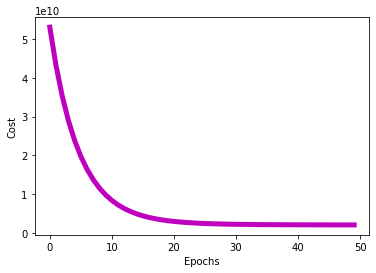

Price of house:  [1.50248496e+08]


In [167]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()
    
    
def test(theta, x):
	x[0] = (x[0] - mu[0])/std[0]
	x[1] = (x[1] - mu[1])/std[1]
	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("Price of house: ", y)
    
    
y = np.reshape(y, (46,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1800, 4])